# Using Machine Learning Techniques to Predict Customer Churn Rates

In [1]:
import pandas as pd
import numpy as np

## Data Load and Review

### Examining the Data Set

In [2]:
# Load the dataset
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
# General information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [4]:
# Display the first few lines
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [5]:
df.shape

(10002, 14)

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.describe(include="float64")

,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary
count,10001.000000,10002.000000,10001.000000,10001.000000,10002.000000
mean,38.922311,76491.112875,0.705529,0.514949,100083.331145
std,10.487200,62393.474144,0.455827,0.499801,57508.117802
min,18.000000,0.000000,0.000000,0.000000,11.580000
25%,32.000000,0.000000,0.000000,0.000000,50983.750000
50%,37.000000,97198.540000,1.000000,1.000000,100185.240000
75%,44.000000,127647.840000,1.000000,1.000000,149383.652500
max,92.000000,250898.090000,1.000000,1.000000,199992.480000


### Data Cleaning and Filling of Missing Values

In [9]:
# Checking for missing values
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


In [10]:
# Filling in missing values
df["Geography"].fillna(df["Geography"].mode()[0], inplace=True)
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["HasCrCard"].fillna(df["HasCrCard"].mode()[0], inplace=True)
df["IsActiveMember"].fillna(df["IsActiveMember"].mode()[0], inplace=True)

In [11]:
# Rechecking missing values
print(df.isnull().sum())


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


## Exploratory Data Analysis (EDA)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\tayla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


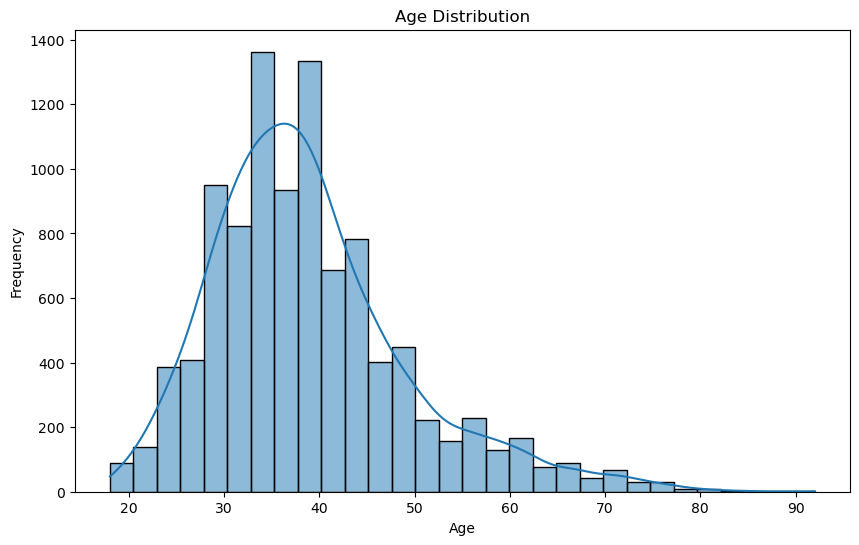

In [13]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

C:\Users\tayla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


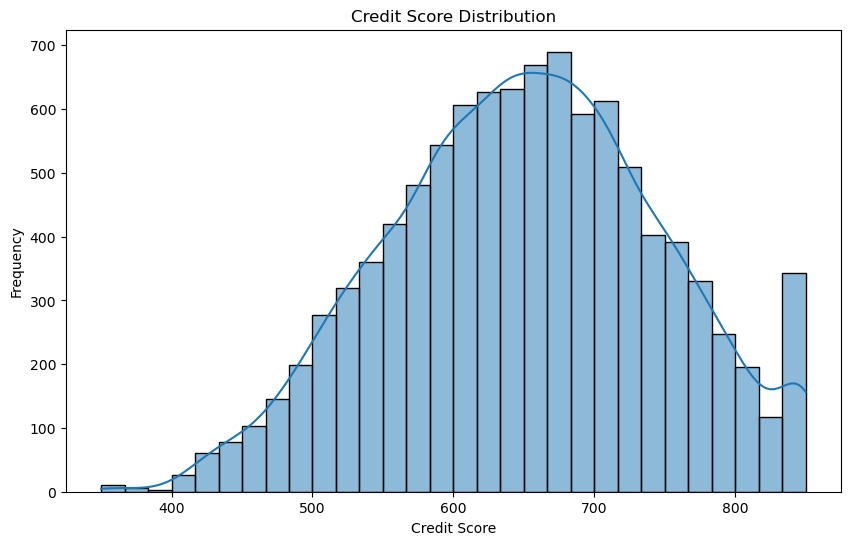

In [14]:
# Credit score distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["CreditScore"], bins=30, kde=True)
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()

C:\Users\tayla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


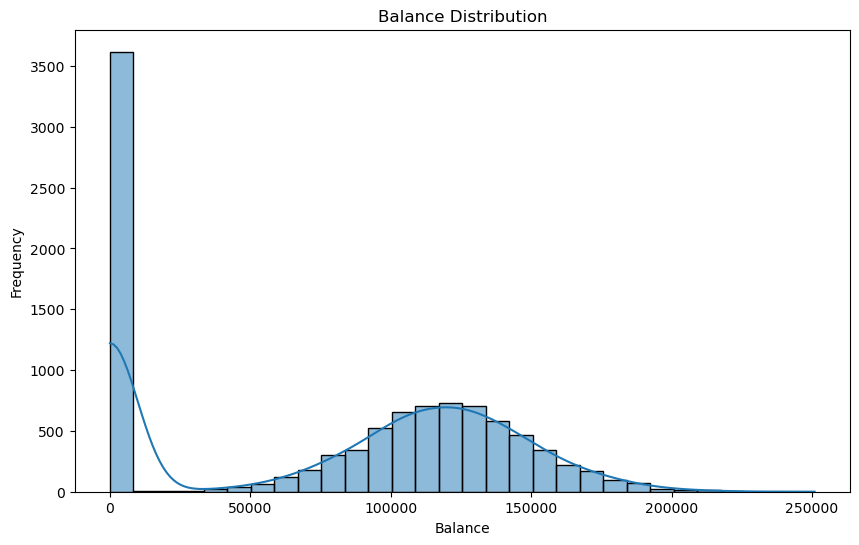

In [15]:
# Balance Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["Balance"], bins=30, kde=True)
plt.title("Balance Distribution")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.show()

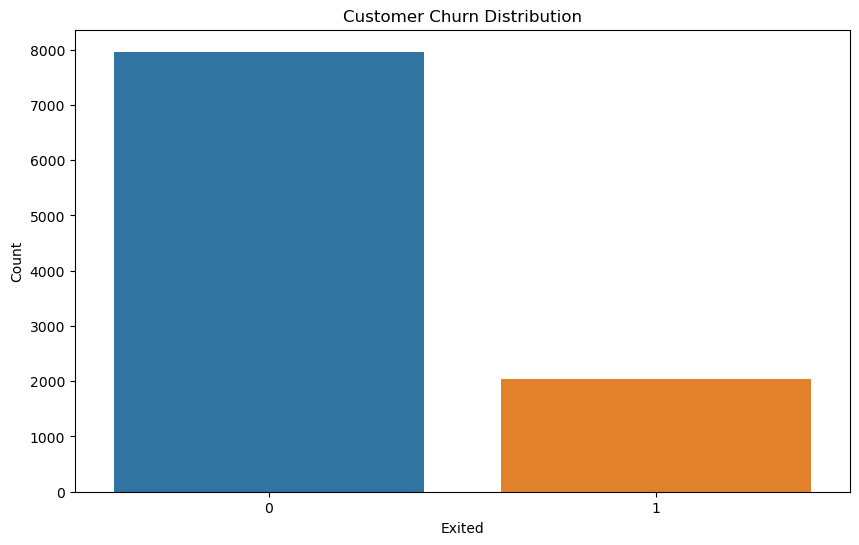

In [16]:
# Customer Churn Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="Exited", data=df)
plt.title("Customer Churn Distribution")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.show()

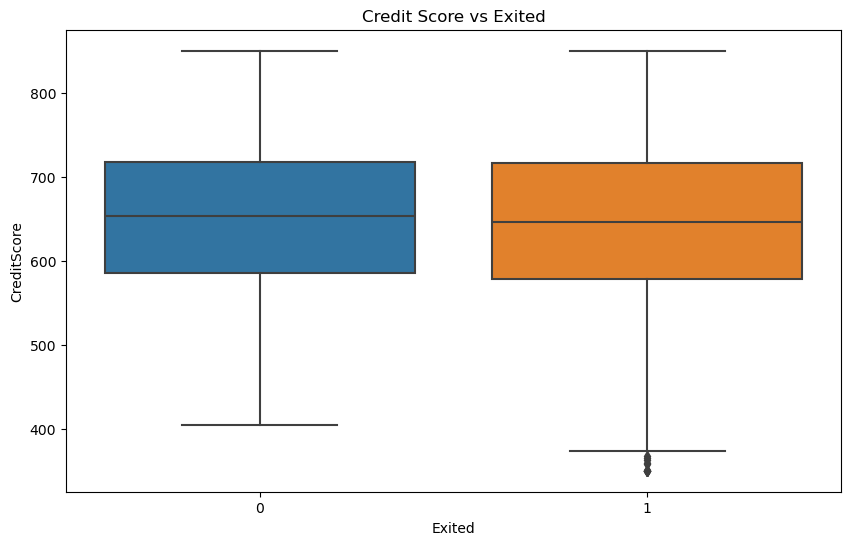

In [17]:
# Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x="Exited", y="CreditScore", data=df)
plt.title("Credit Score vs Exited")
plt.show()

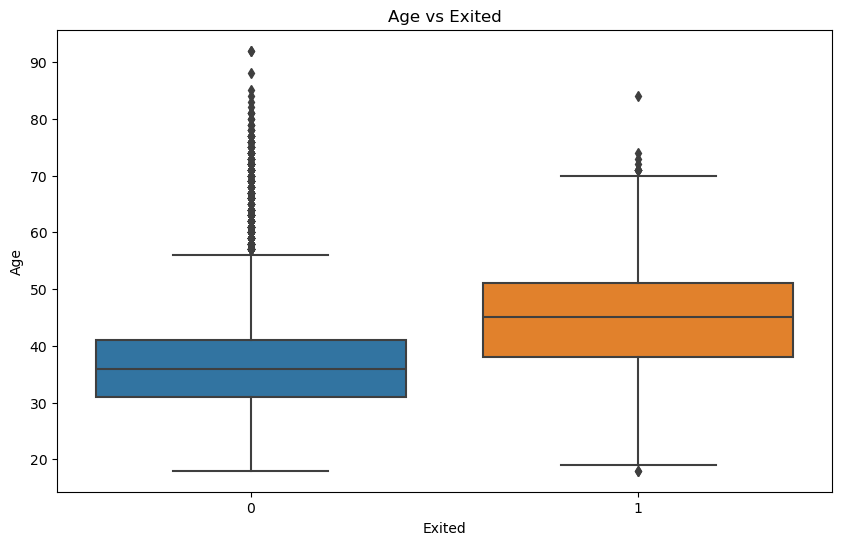

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Exited", y="Age", data=df)
plt.title("Age vs Exited")
plt.show()

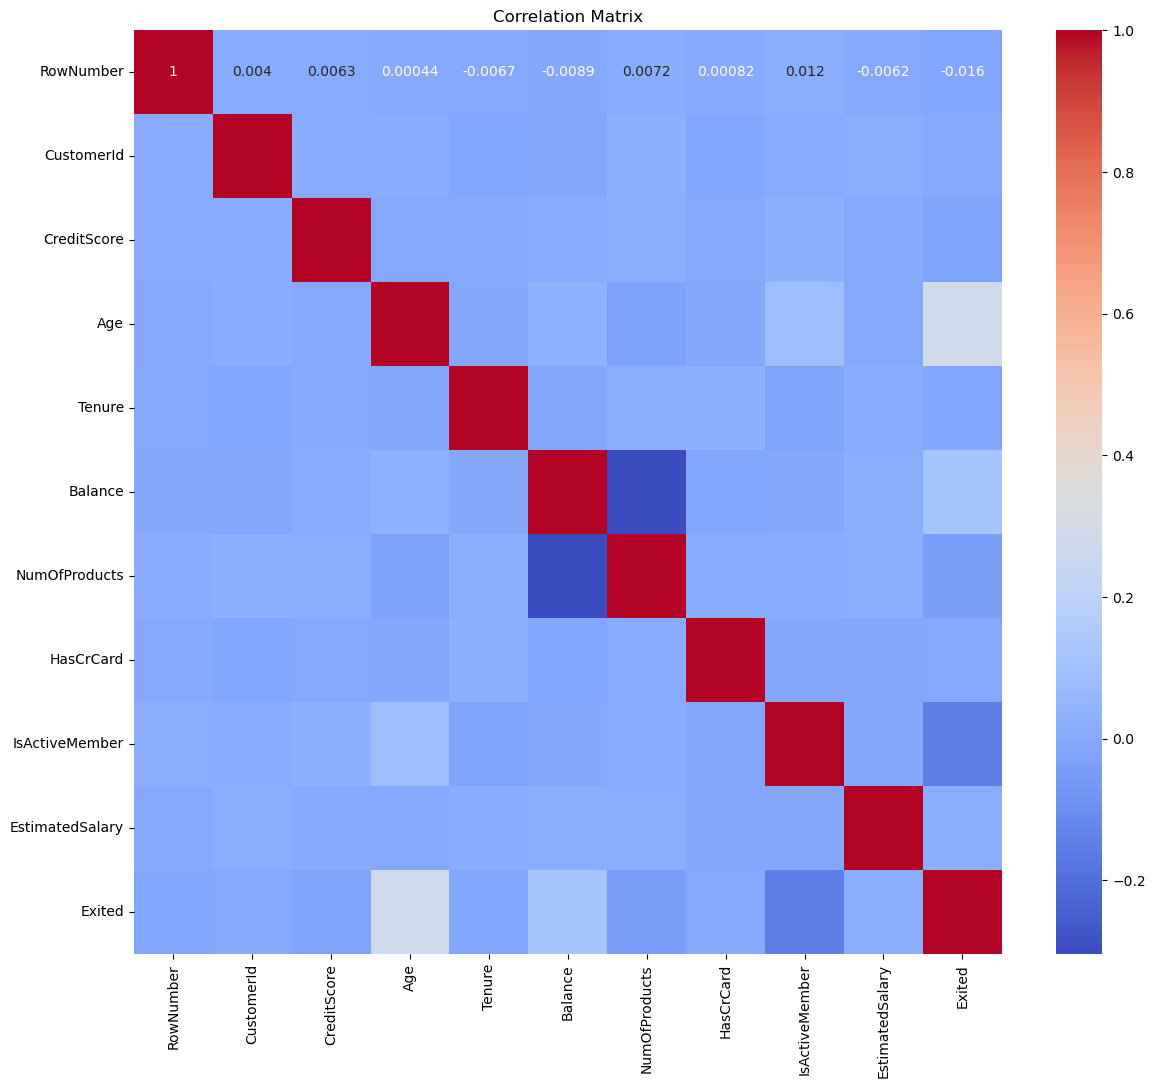

In [19]:
# Correlation Matrix
# Selecting numeric columns of existing DataFrame
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(14, 12))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [20]:
# First Findings
print("Correlation of Credit Score with Exited:", df['CreditScore'].corr(df['Exited']))
print("Correlation of Age with Exited:", df['Age'].corr(df['Exited']))
print("Correlation of Balance with Exited:", df['Balance'].corr(df['Exited']))

Correlation of Credit Score with Exited: -0.026908506171036378
Correlation of Age with Exited: 0.2853141004388624
Correlation of Balance with Exited: 0.11845574364831228


## Feature Engineering and Model Development

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [22]:
# Feature Engineering
df["CreditAge"] = df["CreditScore"] * df["Age"]

In [23]:
# Coding of categorical variables
label_encoder = LabelEncoder()
df["Geography"] = label_encoder.fit_transform(df["Geography"])
df["Gender"] = label_encoder.fit_transform(df["Gender"])

In [24]:
# Separation of Features and Target Variable
X = df.drop(["RowNumber", "CustomerId", "Surname", "Exited"], axis=1)
y = df["Exited"]

In [25]:
# Separation of the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Standardization of data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Machine Learning Implementation and Evaluation

### Logistic Regression Model

Logistic regression was chosen due to its simplicity and interpretability.

In [27]:
# Logistic regression model training
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [28]:
# Making Ppedictions
log_reg_y_pred = log_reg_model.predict(X_test)

In [29]:
# Evaluation of the model
log_reg_accuracy = accuracy_score(y_test, log_reg_y_pred)
log_reg_precision = precision_score(y_test, log_reg_y_pred)
log_reg_recall = recall_score(y_test, log_reg_y_pred)
log_reg_f1 = f1_score(y_test, log_reg_y_pred)

In [30]:
log_reg_results = {
    "Accuracy": log_reg_accuracy,
    "Precision": log_reg_precision,
    "Recall": log_reg_recall,
    "F1 Score": log_reg_f1
}

In [31]:
print("Logistic Regression Results:", log_reg_results)

Logistic Regression Results: {'Accuracy': 0.8090636454515162, 'Precision': 0.5699481865284974, 'Recall': 0.18333333333333332, 'F1 Score': 0.2774274905422446}


In [32]:
from sklearn.metrics import confusion_matrix

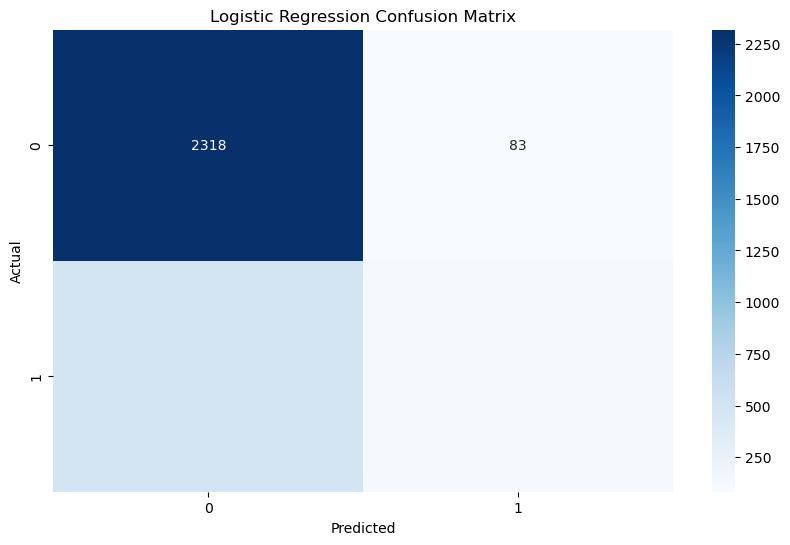

In [33]:
log_reg_conf_matrix = confusion_matrix(y_test, log_reg_y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(log_reg_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Random Forest Model

Random Forest was chosen due to the low rates we achieved in Logistic Regression, as well as its ability to capture more complex relationships and its high accuracy.

In [34]:
# Random Forest model training
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
# Making Ppedictions
rf_y_pred = rf_model.predict(X_test)

In [36]:
# Evaluation of the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)

In [37]:
rf_results = {
    "Accuracy": rf_accuracy,
    "Precision": rf_precision,
    "Recall": rf_recall,
    "F1 Score": rf_f1
}

In [38]:
print("Random Forest Results:", rf_results)

Random Forest Results: {'Accuracy': 0.8633788737087638, 'Precision': 0.7698863636363636, 'Recall': 0.45166666666666666, 'F1 Score': 0.569327731092437}


In [39]:
# Confusion Matrix
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

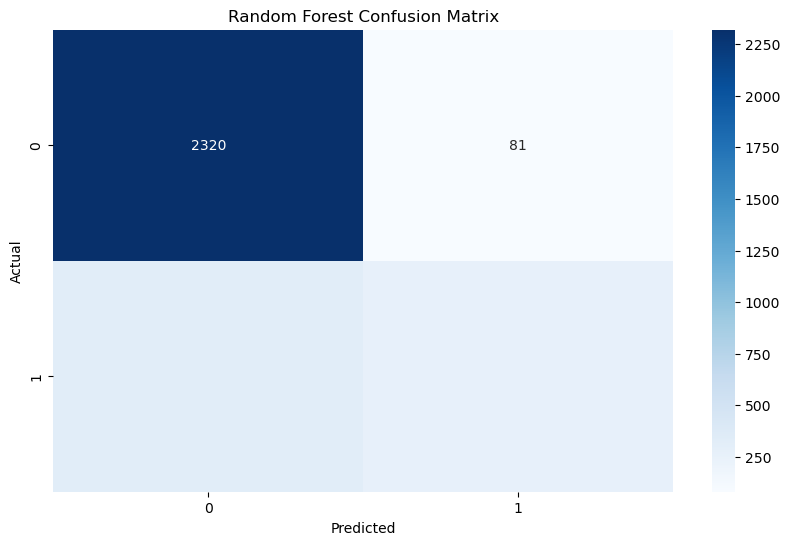

In [40]:
plt.figure(figsize=(10, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Hyperparameter Optimization - Grid Search

In this project, two different machine learning algorithms were used to predict customer abandonment rate: Logistic Regression and Random Forest. Hyperparameter optimization was done with the Grid Search method and the parameters that gave the best performance were determined.

In [41]:
from sklearn.model_selection import GridSearchCV


In [42]:
# Determination of hyperparameter ranges
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

In [43]:
# Finding the best hyperparameters using Grid Search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\tayla\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [44]:
# Best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 300}


In [45]:
# Creating Random Forest model with optimal hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_features=best_params['max_features'],
    max_depth=best_params['max_depth'],
    criterion=best_params['criterion'],
    random_state=42
)

In [46]:
# Optimized Random Forrest model training
best_rf_model.fit(X_train, y_train)

C:\Users\tayla\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=300,
                       random_state=42)

In [47]:
# Making Ppedictions
best_rf_y_pred = best_rf_model.predict(X_test)

In [48]:
# Evaluation of the model
best_rf_accuracy = accuracy_score(y_test, best_rf_y_pred)
best_rf_precision = precision_score(y_test, best_rf_y_pred)
best_rf_recall = recall_score(y_test, best_rf_y_pred)
best_rf_f1 = f1_score(y_test, best_rf_y_pred)

In [49]:
print(f"Optimized Random Forest Accuracy: {best_rf_accuracy}")
print(f"Optimized Random Forest Precision: {best_rf_precision}")
print(f"Optimized Random Forest Recall: {best_rf_recall}")
print(f"Optimized Random Forest F1 Score: {best_rf_f1}")


Optimized Random Forest Accuracy: 0.8620459846717761
Optimized Random Forest Precision: 0.7835365853658537
Optimized Random Forest Recall: 0.42833333333333334
Optimized Random Forest F1 Score: 0.5538793103448276


In [50]:
# Confusion matrix
best_rf_conf_matrix = confusion_matrix(y_test, best_rf_y_pred)

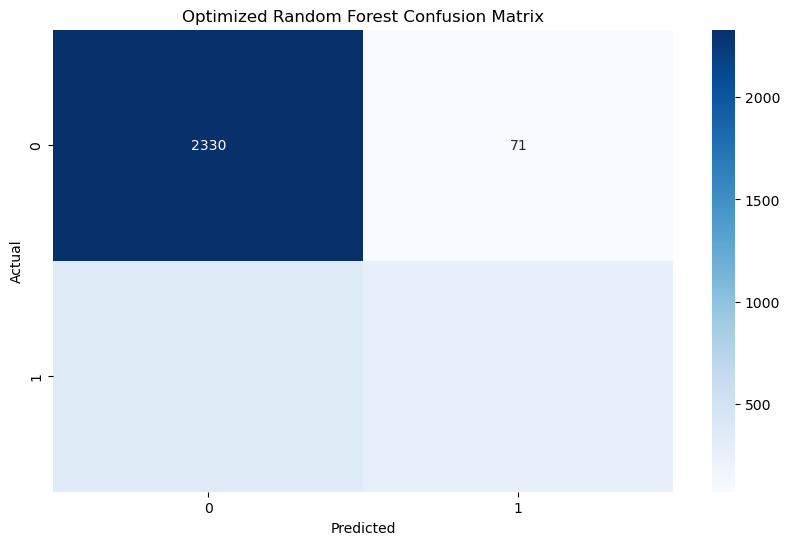

In [51]:
plt.figure(figsize=(10, 6))
sns.heatmap(best_rf_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Optimized Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Model Discussion
The Random Forest model provided higher accuracy and precision compared to the Logistic Regression model. However, both models have strengths and weaknesses in terms of sensitivity and F1 score. In particular, the Random Forest model has been more successful in predicting customer abandonment thanks to its ability to capture more complex relationships. In the future, further feature engineering and the use of alternative algorithms may further improve performance.